# 対数正規分布まとめ

Reference site
- https://analytics-note.xyz/statistics/log-normal-distribution/
- https://analytics-note.xyz/statistics/scipy-lognorm/

## 対数正規分布とは

- 確率変数 $Y$ が 平均 $\mu_Y$、標準偏差 $\sigma_Y^2$ の正規分布に従うとき
$$ Y \sim N(\mu_Y, \sigma_Y^2) $$
- 確率変数 $X=e^Y$ を取ると、この $X$ が従う分布が対数正規分布となる
$$ X \sim Lognormal(\mu_Y, \sigma_Y^2) $$
- ここで、対数正規分布のパラメータ $\mu_Y, \sigma_Y^2$ は、変換前の正規分布のパラメータとなる


## 対数正規分布の確率密度関数
- $\mu_Y, \sigma_Y^2$ は対数正規分布の平均と分散ではないが、対数正規分布の確率密度関数に代入するパラメータとなる
$$ f(x) = \frac{1}{\sqrt{2\pi}\sigma_Y x} \exp\Big(-\frac{(\log x - \mu_Y)^2}{2\sigma_Y^2}\Big), \quad x>0 $$
- 対数正規分布 $X$ の期待値 $E[X]$ と分散 $V[X]$ は、正規分布 $Y$ のパラメータ $\mu_Y, \sigma_Y^2$ で計算される
$$ E[X] = \exp \Big(\mu_Y + \frac{\sigma_Y^2}{2}\Big) $$
$$ V[X] = \exp (2\mu_Y+\sigma_Y^2) (\exp(\sigma_Y^2)-1) $$

## パラメータ変換
与えられた対数正規分布の期待値 $E[X]=\mu_X$ と分散 $V[X]=\sigma_X^2$ から、正規分布のパラメータ $\mu_Y$ と $\sigma_Y$ を導出できる

$$ \mu_Y = \ln(\mu_X) - \frac{\sigma_X^2}{2} $$
$$ \sigma_Y^2 = \ln\Big(\frac{\sigma_X}{\mu_X}^2+1 \Big) $$

これらの式により、正規分布のパラメータ ⇔ 対数正規分布のパラメータ の相互変換ができる

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import norm, lognorm

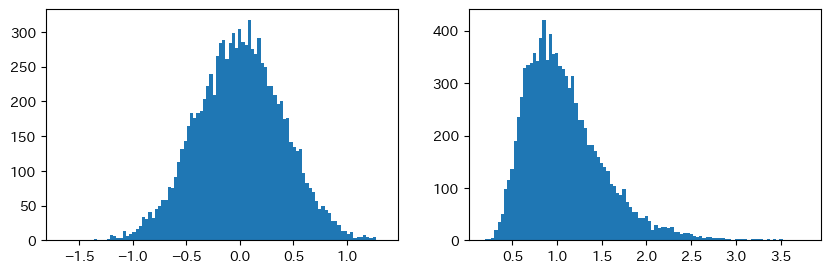

In [11]:
# 正規分布から対数正規分布を作成
norm_data = norm(loc=0, scale=0.4).rvs(size=10000)
log_data = np.exp(norm_data)
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].hist(norm_data, bins=100)
axs[1].hist(log_data, bins=100)
plt.show()

## いくつかの対数正規分布の例

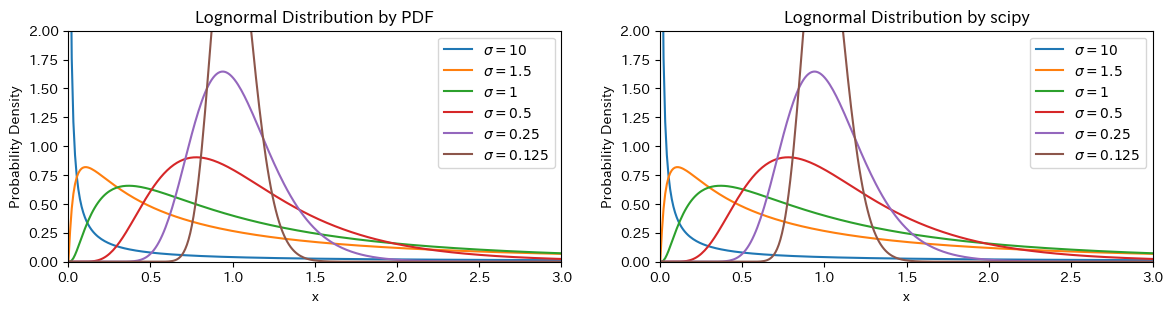

In [16]:
# グラフセッティング
fig, axs = plt.subplots(1, 2, figsize=(14, 3))
axs[0].set_xlim(0, 3)
axs[0].set_ylim(0, 2)
axs[0].set_xlabel('x')
axs[0].set_ylabel('Probability Density')
axs[0].set_title('Lognormal Distribution by PDF')

axs[1].set_xlim(0, 3)
axs[1].set_ylim(0, 2)
axs[1].set_xlabel('x')
axs[1].set_ylabel('Probability Density')
axs[1].set_title('Lognormal Distribution by scipy')

def lognorm_pdf(x):
    '''対数正規分布の確率密度関数を定義'''
    return 1 / (x * sigma * np.sqrt(2 * np.pi)) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))

# グラフの作成
mu = 0
x = np.linspace(0.001, 10, 1000)
    # 確率密度関数により作成
for sigma in [10, 1.5, 1, 1/2, 1/4, 1/8]:
    pdf_values = lognorm_pdf(x)
    axs[0].plot(x, pdf_values, label=f'$\sigma={sigma}$')

    # scipy により作成
    # 対数正規分布のパラメータを計算
    s = sigma
    scale = np.exp(mu)
    # 対数正規分布を生成
    lognorm_dist = lognorm(s=s, loc=0, scale=scale)
    # 確率密度関数を描画
    pdf_values = lognorm_dist.pdf(x)
    axs[1].plot(x, pdf_values, label=f'$\sigma={sigma}$')

axs[0].legend()
axs[1].legend()
plt.show()


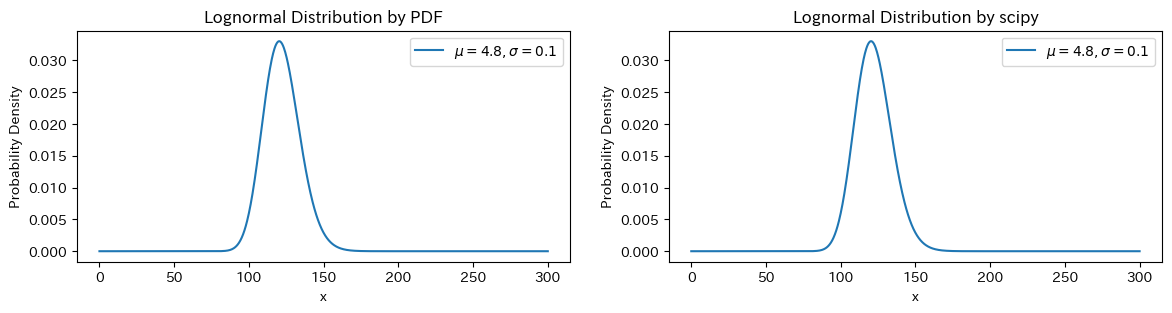

In [19]:
# グラフセッティング
fig, axs = plt.subplots(1, 2, figsize=(14, 3))
# axs[0].set_xlim(0, 3)
# axs[0].set_ylim(0, 2)
axs[0].set_xlabel('x')
axs[0].set_ylabel('Probability Density')
axs[0].set_title('Lognormal Distribution by PDF')

# axs[1].set_xlim(0, 3)
# axs[1].set_ylim(0, 2)
axs[1].set_xlabel('x')
axs[1].set_ylabel('Probability Density')
axs[1].set_title('Lognormal Distribution by scipy')

def lognorm_pdf(x):
    '''対数正規分布の確率密度関数を定義'''
    return 1 / (x * sigma * np.sqrt(2 * np.pi)) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))

# グラフの作成
mu = 4.8
x = np.linspace(0.001, 300, 1000)
    # 確率密度関数により作成
for sigma in [0.1]:
    pdf_values = lognorm_pdf(x)
    axs[0].plot(x, pdf_values, label=f'$\mu={mu}, \sigma={sigma}$')

    # scipy により作成
    # 対数正規分布のパラメータを計算
    s = sigma
    scale = np.exp(mu)
    # 対数正規分布を生成
    lognorm_dist = lognorm(s=s, loc=0, scale=scale)
    # 確率密度関数を描画
    pdf_values = lognorm_dist.pdf(x)
    axs[1].plot(x, pdf_values, label=f'$\mu={mu}, \sigma={sigma}$')

axs[0].legend()
axs[1].legend()
plt.show()


## scipy.stats.lognorm について確認

In [21]:
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

Calculate the first moments **lognorm**

In [75]:
s = 1
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')
print(f'm = {mean:.05f}, v = {var:.05f}, s = {skew:.05f}, k = {kurt:.05f}')

mu = 0 
scale = np.exp(mu)
mean, var, skew, kurt = lognorm.stats(s=s, scale=scale, moments='mvsk')
print(f'm = {mean:.05f}, v = {var:.05f}, s = {skew:.05f}, k = {kurt:.05f}')

mu = 1
scale = np.exp(mu)
mean, var, skew, kurt = lognorm.stats(s=s, scale=scale, moments='mvsk')
print(f'm = {mean:.05f}, v = {var:.05f}, s = {skew:.05f}, k = {kurt:.05f}')

m = 1.64872, v = 4.67077, s = 6.18488, k = 110.93639
m = 1.64872, v = 4.67077, s = 6.18488, k = 110.93639
m = 4.48169, v = 34.51261, s = 6.18488, k = 110.93639


Calculate the first moments **norm**

In [61]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
print(f'm = {mean:.05f}, v = {var:.05f}, s = {skew:.05f}, k = {kurt:.05f}')

mu, sigma = 0, 1
mean, var, skew, kurt = norm.stats(loc=mu, scale=sigma, moments='mvsk')
print(f'm = {mean:.05f}, v = {var:.05f}, s = {skew:.05f}, k = {kurt:.05f}')

mu, sigma = 1, 3
mean, var, skew, kurt = norm.stats(mu, sigma, moments='mvsk')
print(f'm = {mean:.05f}, v = {var:.05f}, s = {skew:.05f}, k = {kurt:.05f}')

m = 0.00000, v = 1.00000, s = 0.00000, k = 0.00000
m = 0.00000, v = 1.00000, s = 0.00000, k = 0.00000
m = 1.00000, v = 9.00000, s = 0.00000, k = 0.00000


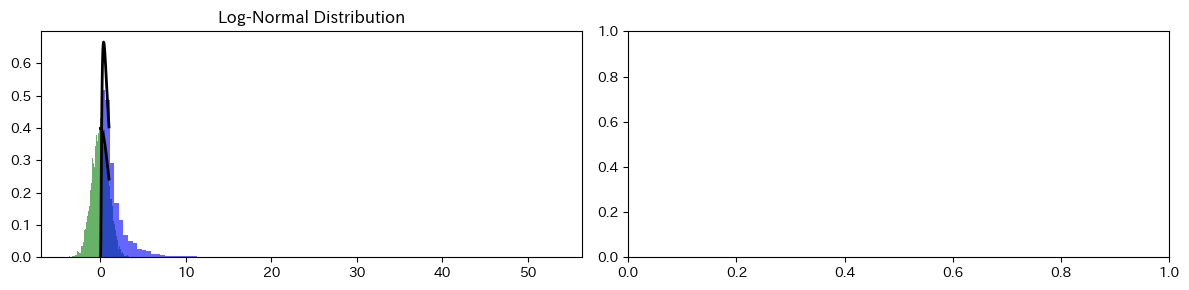

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# 標準正規分布のパラメータ
mu = 0    # 平均
sigma = 1 # 標準偏差

# 標準正規分布からデータを生成
norm_data = norm.rvs(loc=mu, scale=sigma, size=10000)

# 対数変換して対数正規分布を生成
lognorm_data = np.exp(norm_data)

# ヒストグラムをプロット
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

# 標準正規分布のヒストグラム
axs[0].hist(norm_data, bins=100, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
axs[0].plot(x, p, 'k', linewidth=2)
axs[0].set_title('Standard Normal Distribution')

# 対数正規分布のヒストグラム
axs[0].hist(lognorm_data, bins=100, density=True, alpha=0.6, color='b')
shape, loc, scale = lognorm.fit(lognorm_data, floc=0)  # 対数正規分布のパラメータをフィット
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = lognorm.pdf(x, shape, loc, scale)
axs[0].plot(x, p, 'k', linewidth=2)
axs[0].set_title('Log-Normal Distribution')

plt.tight_layout()
plt.show()


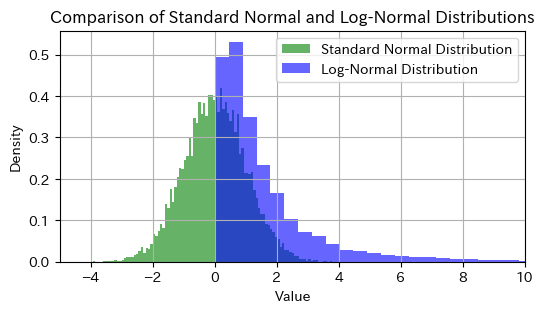

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# 標準正規分布のparameter
mu = 0    # 平均
sigma = 1 # 標準偏差

# 標準正規分布からデータを生成
norm_data = norm.rvs(loc=mu, scale=sigma, size=10000)

# 対数変換して対数正規分布を生成
lognorm_data = np.exp(norm_data)

# histをplot
plt.figure(figsize=(6, 3))

# 標準正規分布のhist
plt.hist(norm_data, bins=100, density=True, alpha=0.6, color='g', label='Standard Normal Distribution')

# 対数正規分布のhist
plt.hist(lognorm_data, bins=100, density=True, alpha=0.6, color='b', label='Log-Normal Distribution')

plt.title('Comparison of Standard Normal and Log-Normal Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(-5, 10)
plt.legend()
plt.grid(True)
plt.show()


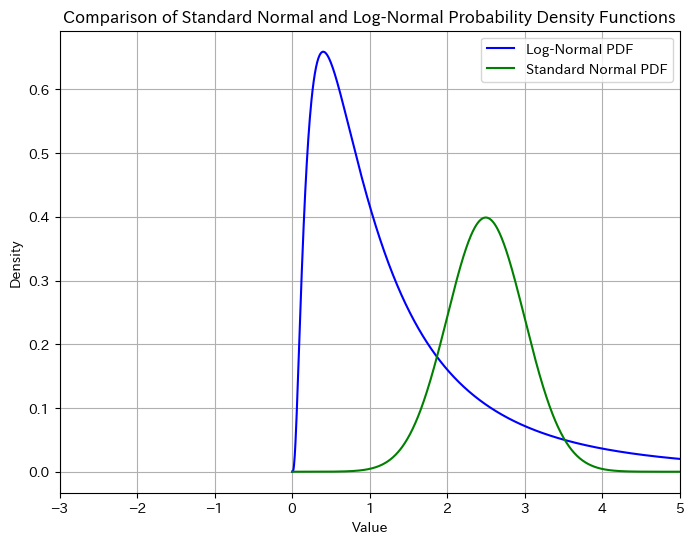

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

x = np.linspace(-5, 5, 1000)
norm_pdf = norm.pdf(x)

# プロット
plt.figure(figsize=(8, 6))
# 標準正規分布の確率密度関数をプロット
plt.plot(x, norm_pdf, 'g-', label='Standard Normal PDF')

# 対数正規分布の確率密度関数のパラメータを設定
s = 0.954  # 対数正規分布の形状パラメータ
# 対数正規分布の確率密度関数を計算
x = np.linspace(0, 5, 1000)
lognorm_pdf = lognorm.pdf(x, s)


# 対数正規分布の確率密度関数をプロット
plt.plot(x, lognorm_pdf, 'b-', label='Log-Normal PDF')


plt.title('Comparison of Standard Normal and Log-Normal Probability Density Functions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(-3, 5)
plt.legend()
plt.grid(True)
plt.show()
